<a href="https://colab.research.google.com/github/bcaffo/ds4ph-bme/blob/master/notebooks/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, we'll classify cryptopunk attributes. You might have heard of the recent NFT (non-fungible token) craze. Cryptopunks are example NFT assets that one can buy. As of this writing, the cheapest Cryptopunk is worth over $40,000 dollars. The punks each have attributes, like a mustache or hairstyle. We'll train a conv net to classify punks by attributes. First we'll need to download all of the cryptopunks, which are in a giant single image file. Then separate them into the individual punks. (There's probably an easier way to do this, but this wasn't that hard.) Next we will download a database of attributes. You will then build a tensorflow model to predict the attributes given the images.

In [1]:
import urllib.request
import PIL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Import the image of all of the cryptopunks.

In [ ]:

imgURL = "https://raw.githubusercontent.com/larvalabs/cryptopunks/master/punks.png"
urllib.request.urlretrieve(imgURL, "cryptoPunksAll.jpg")


('cryptoPunksAll.jpg', <http.client.HTTPMessage at 0x7f1a775e8e10>)

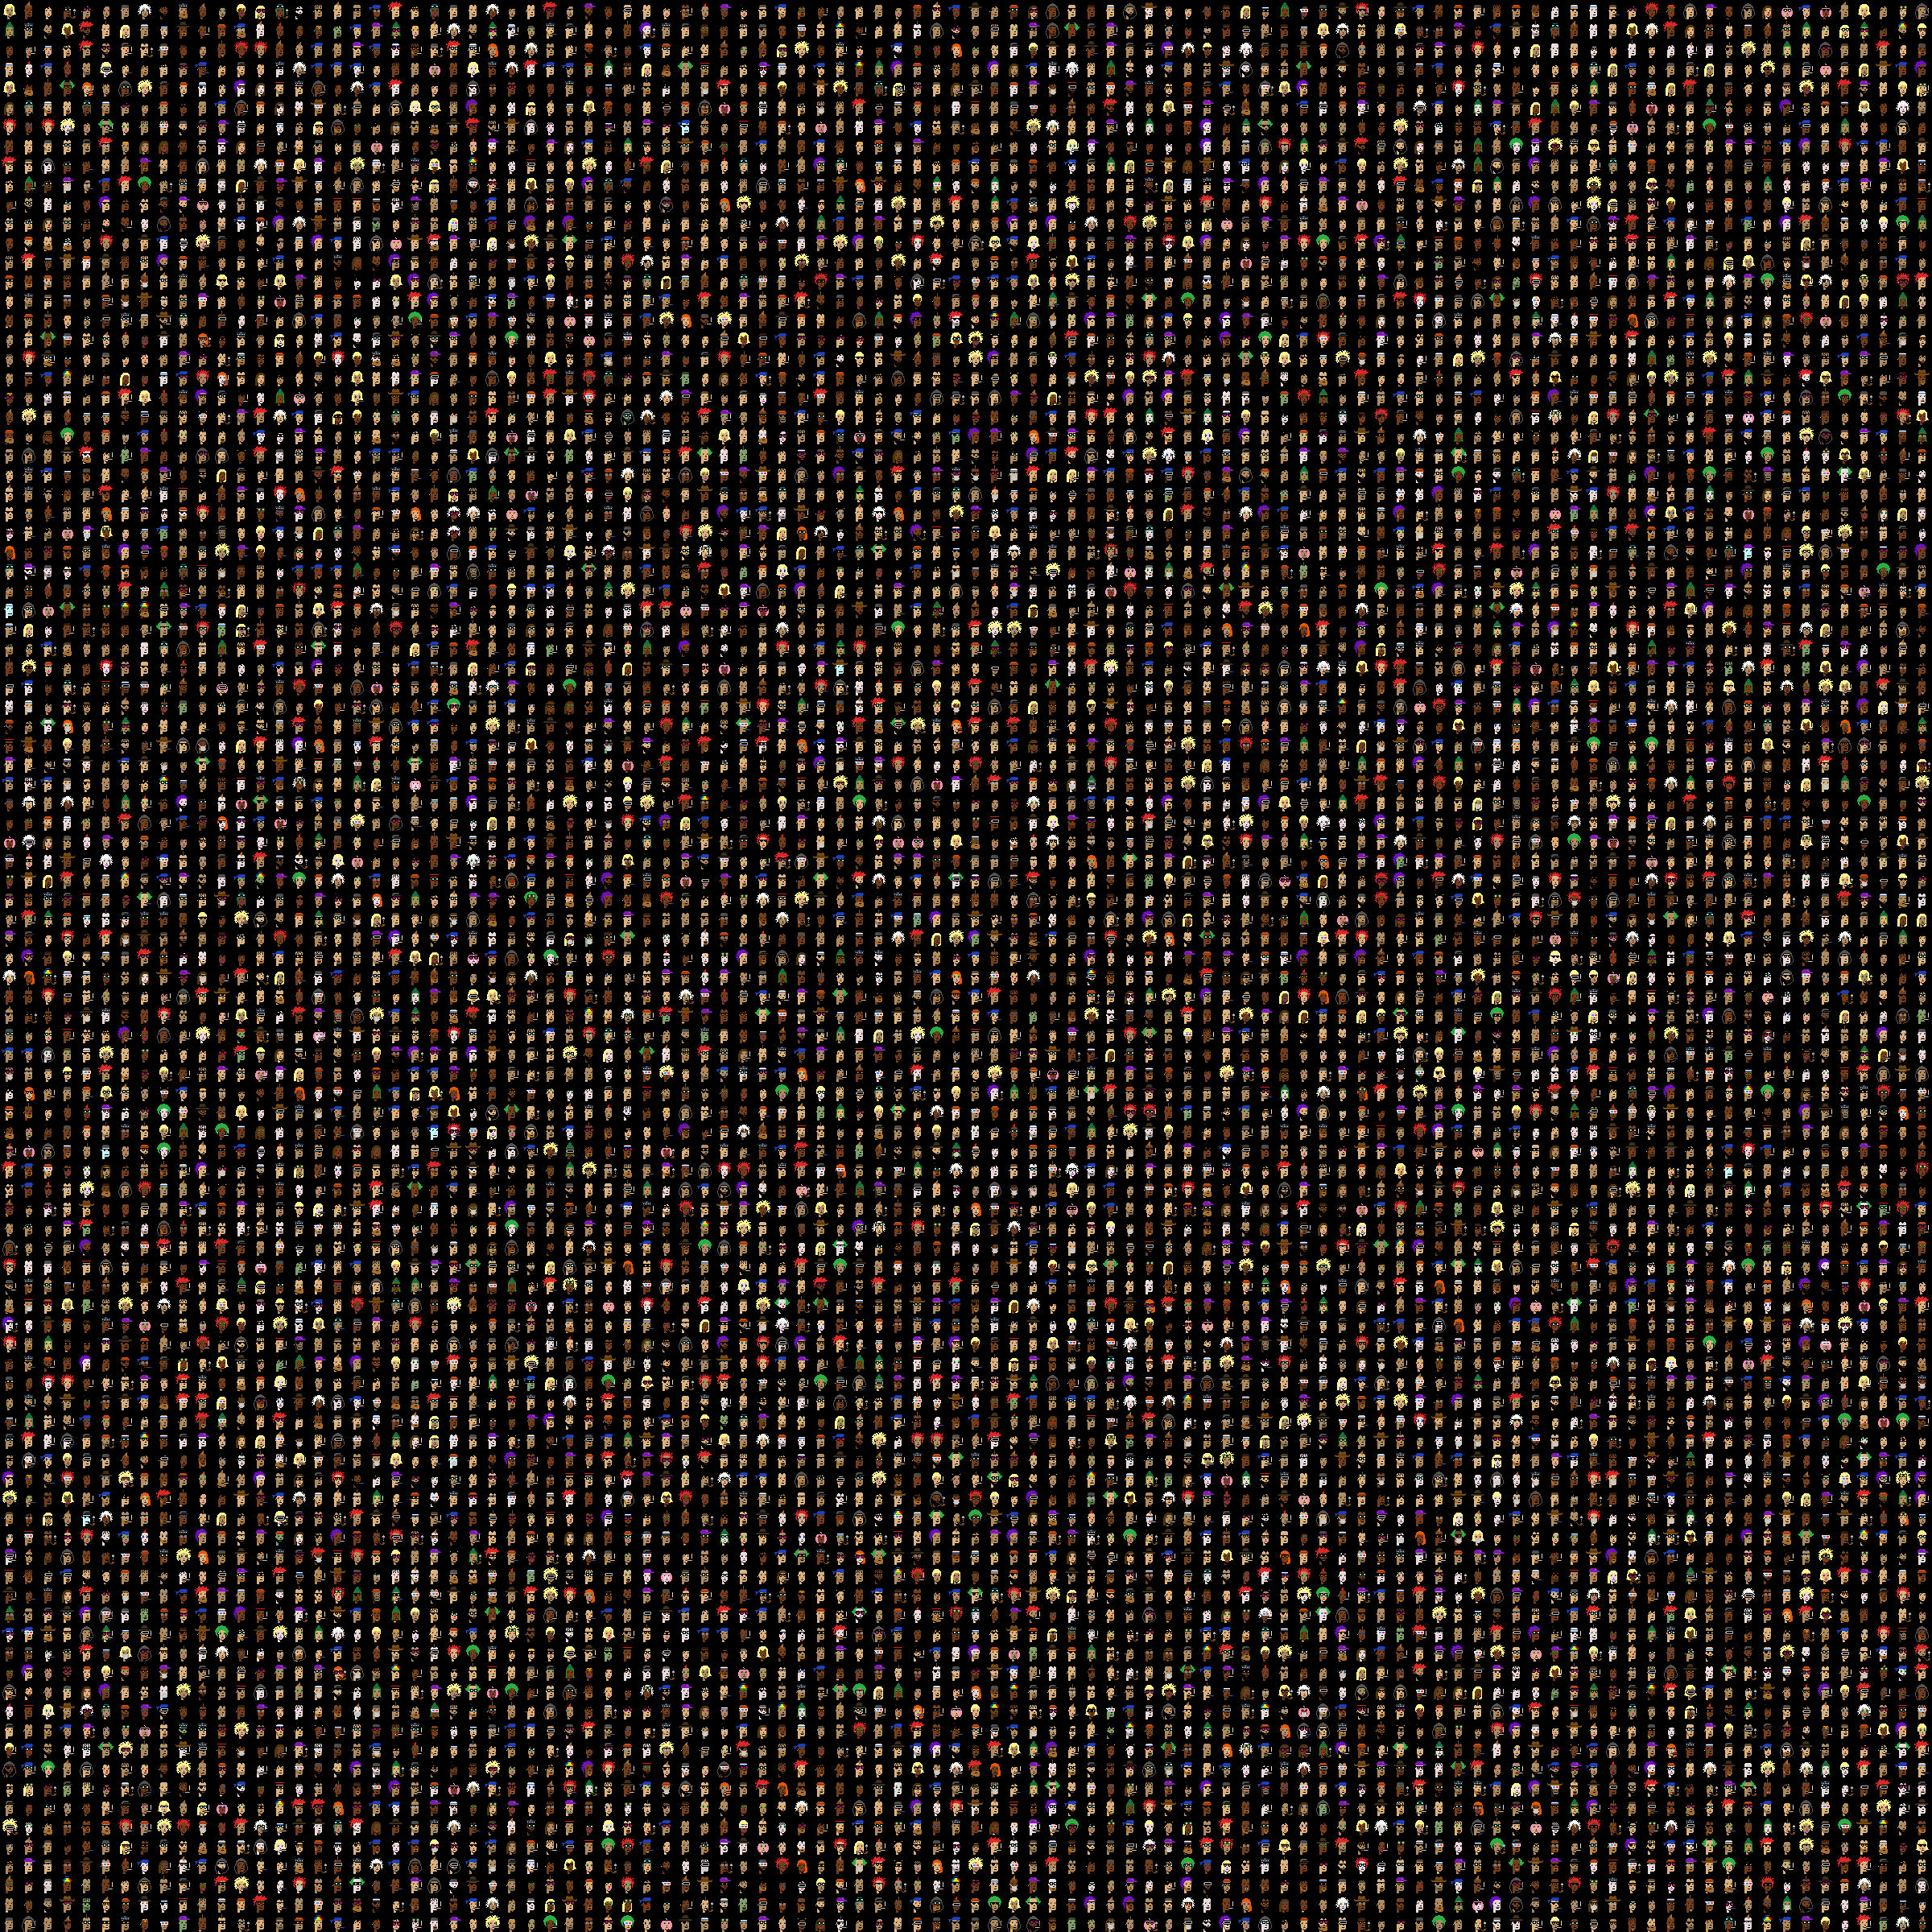

In [ ]:
img = PIL.Image.open("cryptoPunksAll.jpg").convert("RGB")
img

It looks like there's 100x100=10,000 crypto punks each one being a 24x24 (x3 color channels) image. 

In [ ]:
img.size

(2400, 2400)

Convert to a numpy array and visualize some. Here's punk 0.

([], <a list of 0 Text major ticklabel objects>)

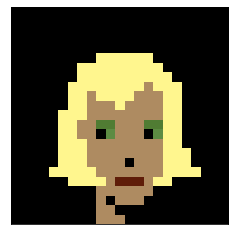

In [ ]:
imgArray = np.asarray(img)
plt.imshow(imgArray[0 : 23, 0 : 23, :])
plt.xticks([])
plt.yticks([])


Here's punks 0 : 24. You can double check that the reference image is filling by rows associated with the punk's index by looking at links like these (change the final number which is the punk's index):

*   https://www.larvalabs.com/cryptopunks/details/0
*   https://www.larvalabs.com/cryptopunks/details/1



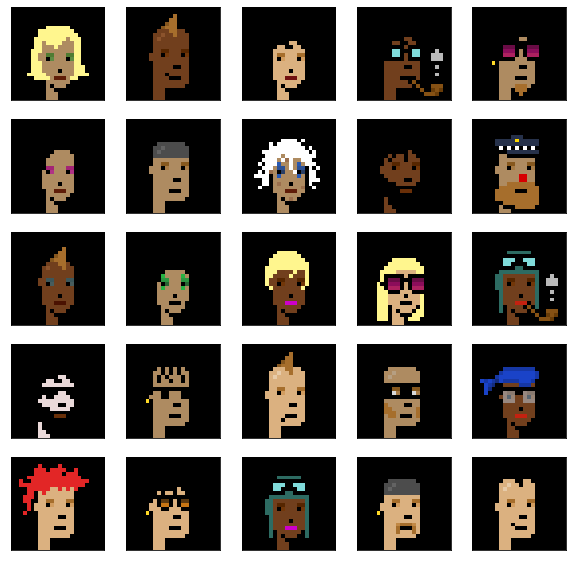

In [ ]:
#Plot out the first 25 punks
plt.figure(figsize=(10,10))
for i in range(25): 
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  a, b = (24 * i), (24 * (i + 1))
  plt.imshow(imgArray[0 : 24, a : b, :])

Reorder the array. I couldn't get reshape to do this right, but I think this is a one-line command waiting to happen. See if you can figure out a better way. All images are 24x24x3 and there's 10,000 punks. (Supposedly, there will only ever be 10k punks.)


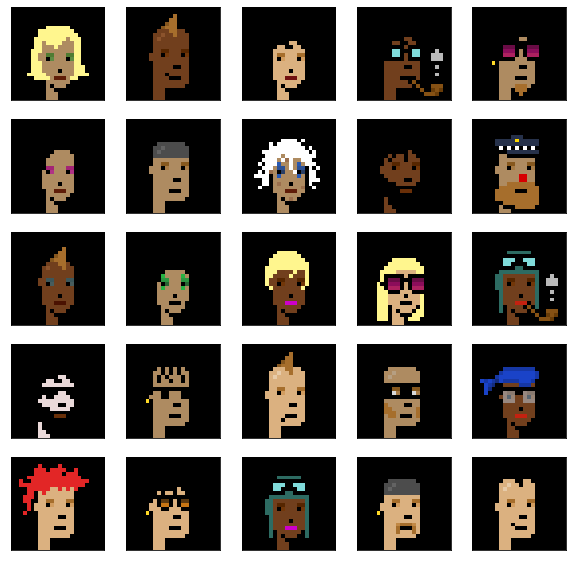

In [ ]:
finalArray = np.empty((24,24, 3, 10000))
for i in range(100):
  for j in range(100):
    a, b = 24 * i, 24 * (i + 1)  
    c, d = 24 * j, 24 * (j + 1) 
    idx = j + i * (100)
    finalArray[:,:,:,idx] = imgArray[a:b,c:d,:]

## double check with above
## apparently the .astype('uint8') is needed to display correctly now
plt.figure(figsize=(10,10))
for i in range(25): 
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(finalArray[:,:,:,i].astype('uint8'))

This site has the data in a few csv files https://github.com/cryptopunksnotdead/punks/



In [ ]:
baseUrl = "https://raw.githubusercontent.com/cryptopunksnotdead/punks/master/"
for i in range(0,10000, 1000):
  url = baseUrl+str(i)+"-"+str(i + 999)+".csv"
  print(url)
  if (i == 0):
    dat = pd.read_csv(url)
  else :
    dat = pd.concat ([dat, pd.read_csv(url)], 
                     join = 'inner',
                     ignore_index = True)



https://raw.githubusercontent.com/cryptopunksnotdead/punks/master/0-999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks/master/1000-1999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks/master/2000-2999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks/master/3000-3999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks/master/4000-4999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks/master/5000-5999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks/master/6000-6999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks/master/7000-7999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks/master/8000-8999.csv
https://raw.githubusercontent.com/cryptopunksnotdead/punks/master/9000-9999.csv


In [ ]:
dat.head()

,id,type,count,accessories,earring
0,0,Female,3,Green Eye Shadow / Earring / Blonde Bob,1
1,1,Male,2,Smile / Mohawk,0
2,2,Female,1,Wild Hair,0
3,3,Male,3,Wild Hair / Nerd Glasses / Pipe,0
4,4,Male,4,Big Shades / Wild Hair / Earring / Goat,1


Let's look at the accessories. I'm going to change it into one big string then separate it. You can check this with this: https://www.larvalabs.com/cryptopunks/attributes. I'm going to say, let's try to figure out whether or not they have an earring. Here's some code to assign 1 or 0 for earring or not.

In [ ]:
dat = dat.assign(earring= (dat[' accessories'].str.find("Earring") > 0) * 1)
dat.earring.value_counts()

0    7541
1    2459
Name: earring, dtype: int64

So, your assignment, is to build and validate a convolutional neural network for determining whether a punk has an earring or not.